In [1]:
import numpy as np 
import pandas as pd
from pandas import DataFrame, Series
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("ks-projects-201801.csv")

In [3]:
# Convert launched and deadline to datatime
from datetime import datetime
df['deadline'] = [datetime.strptime(x, '%Y-%m-%d') for x in df.deadline]
df['launched'] = [datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in df.launched]

In [4]:
# Create columns to store year, month, day, duration
#
df['duration'] = (df.loc[:, 'deadline'] - df.loc[:, 'launched']).apply(lambda l: l.days)
df['launched_month'] = df.loc[:, 'launched'].apply(lambda l: l.month)
df['launched_year'] = df.loc[:, 'launched'].apply(lambda l: l.year)
df['launched_day'] = df.loc[:, 'launched'].apply(lambda l: l.dayofyear)
df['deadline_month'] = df.loc[:, 'deadline'].apply(lambda l: l.month)
df['deadline_year'] = df.loc[:, 'deadline'].apply(lambda l: l.year)
df['deadline_day'] = df.loc[:, 'deadline'].apply(lambda l: l.dayofyear)
df['duration_5'] = np.ceil(df.loc[:, 'duration'] / 5) * 5
df['succeed'] = np.where(df['state'] == 'successful', 1, 0)
df['log10_usd_goal_real'] = np.log10(df['usd_goal_real'])

In [5]:
years_values = sorted(df.loc[:, 'launched_year'].unique())
for year in years_values:
    month_values = sorted(df[df['launched_year']==year].loc[:, 'launched_month'].unique())
    print (year, month_values)

1970 [1]
2009 [4, 5, 6, 7, 8, 9, 10, 11, 12]
2010 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2011 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2012 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2013 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2014 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2015 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2016 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2017 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2018 [1]


The dataset does not contain full year data for 1970, 2009 and 2018, so we will use only '2010 - 2017' for the yearly analysis

In [6]:
# Set the values of year for analysis
years_values = [2010,2011,2012,2013,2014,2015,2016,2017] 

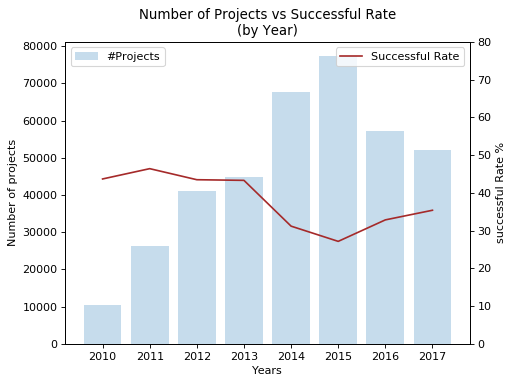

In [79]:
# to compare the number of launched project and the succesful rate by year

project_year_count = df.launched_year.value_counts().sort_index(ascending=True)
project_year_count = project_year_count[years_values]

state_year_count = pd.crosstab(df['state'],df['launched_year'],margins=True)
state_year_rate = (state_year_count/state_year_count.loc['All']*100).round(2)
state_year_rate = state_year_rate.drop(['All']).drop(['All'],axis=1)
state_year_success_rate = state_year_rate.loc['successful', years_values]

fig = plt.figure(figsize=(15, 5), dpi= 80)
fig.tight_layout() 
plt.subplots_adjust(wspace = .3)

ax1 = plt.subplot(1, 2, 1)
plt.title('Number of Projects vs Successful Rate\n(by Year)')

ax2 = ax1.twinx()
ax1.bar(project_year_count.index, project_year_count.values, alpha = 0.25)
ax1.set_xlabel('Years')
ax1.set_ylabel('Number of projects')
ax1.legend(['#Projects'], loc=2)

ax2.set_ylabel('successful Rate %')
ax2.set_ylim(0,80)
ax2.plot(years_values, state_year_success_rate.values, color = 'brown')
ax2.legend(['Successful Rate'], loc=1)

plt.show()


- The successful rate was about constant from 2010 to 2013 as the number of projects was increased. There was a change in trend in 2014 as the number of projects grew quickly, the successful rate was lower than before, and the trend continued to 2015.
- There was another change of trend in 2016 as the number of projects dropped substantially, but the successful rate was high than before, ad the trend continued to 2017


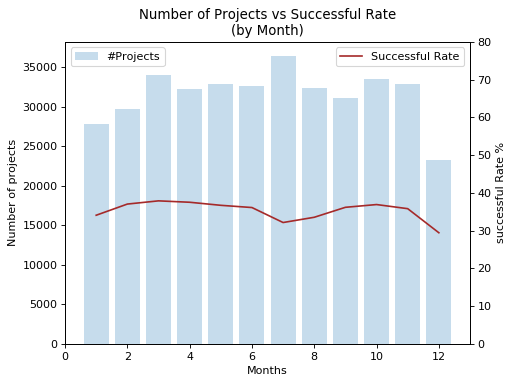

In [101]:
# to compare the number of launched project and the succesful rate by month

project_month_count = df.launched_month.value_counts().sort_index(ascending=True)
# project_month_count = project_month_count[years_values]

state_month_count = pd.crosstab(df['state'],df['launched_month'],margins=True)
state_month_rate = (state_month_count/state_month_count.loc['All']*100).round(2)
state_month_rate = state_month_rate.drop(['All']).drop(['All'],axis=1)
state_month_success_rate = state_month_rate.loc['successful']

fig = plt.figure(figsize=(15, 5), dpi= 80)
fig.tight_layout() 
plt.subplots_adjust(wspace = .3)

ax1 = plt.subplot(1, 2, 1)
plt.title('Number of Projects vs Successful Rate\n(by Month)')

ax2 = ax1.twinx()
ax1.bar(project_month_count.index, project_month_count.values, alpha = 0.25)
ax1.set_xlabel('Months')
ax1.set_ylabel('Number of projects')
ax1.legend(['#Projects'], loc=2)

ax2.set_ylabel('successful Rate %')
ax2.set_ylim(0,80)
ax2.plot(state_month_success_rate, color = 'brown')
ax2.legend(['Successful Rate'], loc=1)

plt.show()

- The charts shows that the successful rate are low in July and December, probably due to summer and Christmas, people might be less interested in funding projects during vacation and holiday seasons. Other than that, the successful rate of other months are quite constant

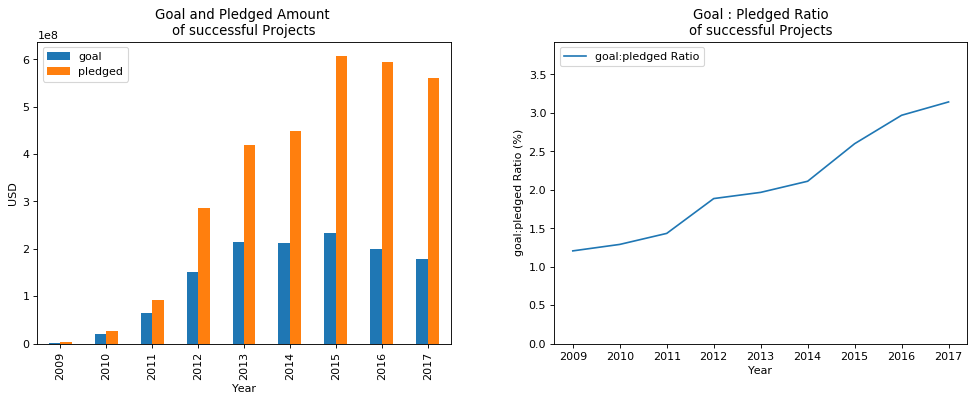

In [81]:
# Compare the Goal and Pledged amount by year and calculate the ratio
#
goal_pledged_ratio = yearFund['usd_pledged_real'] / yearFund['usd_goal_real']

fig = plt.figure(figsize=(15, 5), dpi= 80)
fig.tight_layout() 
plt.subplots_adjust(wspace = .25)

ax1 = plt.subplot(1, 2, 1)
ax1.set_title('Goal and Pledged Amount \nof successful Projects')

yearFund.plot.bar(ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('USD')
# ax1.set_ylim(0,yaxis_lim)
ax1.legend(['goal','pledged'], loc=2)

ax2 = plt.subplot(1, 2, 2)
ax2.set_title('Goal : Pledged Ratio\nof successful Projects')
ax2.set_ylabel('goal:pledged Ratio (%)')
ax2.set_xlabel('Year')
#ax2.set_ylim(min=0)
ax2.set_ylim(ymin=0, ymax=max(goal_pledged_ratio.values)*1.25)
ax2.plot(goal_pledged_ratio)
ax2.legend(['goal:pledged Ratio'], loc=2)

plt.show()

- The ratio of goal and pledged amount has gone up from 1.25 in 2009 to 3 in 2017

In [10]:
df.duration_5.value_counts().sort_index(ascending=True)

0.0           102
5.0          1426
10.0         6056
15.0        13004
20.0        18088
25.0        16282
30.0       197033
35.0        30216
40.0        18577
45.0        24778
50.0         6635
55.0         3755
60.0        37993
65.0          694
70.0          408
75.0          366
80.0          270
85.0          298
90.0         2651
95.0           22
14710.0         1
14735.0         1
14750.0         1
14760.0         1
14835.0         1
14870.0         1
16740.0         1
Name: duration_5, dtype: int64

- We will look into durations between 0 and 100

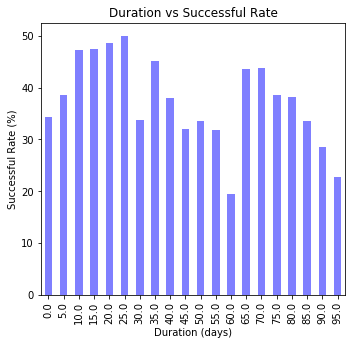

In [98]:
# duration vs successful rate
#
state_duration5_count = pd.crosstab(df['state'],df['duration_5'],margins=True)
state_duration5_rate = (state_duration5_count/state_duration5_count.loc['All']*100).round(2)
state_duration5_rate = state_duration5_rate.drop(['All']).drop(['All'],axis=1)
#
a = state_duration5_rate
duration_success_rate = a.loc['successful', a.columns[a.columns <= 100]]
duration_failure_rate = a.loc['failed', a.columns[a.columns <= 100]]
#
fig, axes = plt.subplots(1,1, figsize=(12,5))
ax1 = plt.subplot(1,2,1)
duration_success_rate.plot.bar(ax=ax1, color='blue', alpha=0.5)
ax1.set_title('Duration vs Successful Rate')
ax1.set_xlabel('Duration (days)')
ax1.set_ylabel('Successful Rate (%)')

plt.show()

- There is no strong connection shown between duration and successful rate of the project, so given more time to the project does not promise its success

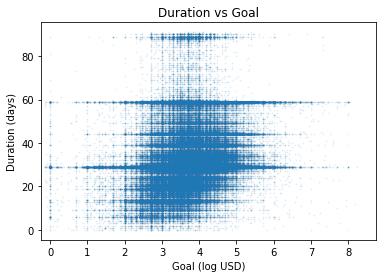

In [93]:
# duration vs goal
#
df[df['duration']<=100].plot(kind='scatter', x='log10_usd_goal_real', y='duration', s=0.5, alpha=0.1)
plt.xlim(-0.25)
plt.title('Duration vs Goal')
plt.xlabel('Goal (log USD)')
plt.ylabel('Duration (days)')
plt.show()

- The scatter plot shows that goal is generally independent of duration.
- There is also notice that most of the projects are limited their durations up to 60 days